<a href="https://colab.research.google.com/github/Bunencio/Projects_Data_Scientist/blob/main/Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sales dataset

### Sales Data Description
This dataset represents synthetic sales data generated for practice purposes only. It is not real-time or based on actual business operations, and should be used solely for educational or testing purposes. The dataset contains information that simulates sales transactions across different products, regions, and customers. Each row represents an individual sale event with various details associated with it.

### Columns in the Dataset

Product_ID: Unique identifier for each product sold. Randomly generated for practice purposes.

Sale_Date: The date when the sale occurred. Randomly selected from the year 2023.

Sales_Rep: The sales representative responsible for the transaction. The dataset includes five random sales representatives (Alice, Bob, Charlie, David, Eve).

Region: The region where the sale took place. The possible regions are North, South, East, and West.

Sales_Amount: The total sales amount for the transaction, including discounts if any. Values range from 100 to 10,000 (in currency units).

Quantity_Sold: The number of units sold in that transaction, randomly generated between 1 and 50.

Product_Category: The category of the product sold. Categories include Electronics, Furniture, Clothing, and Food.

Unit_Cost: The cost per unit of the product sold, randomly generated between 50 and 5000 currency units.

Unit_Price: The selling price per unit of the product, calculated to be higher than the unit cost.

Customer_Type: Indicates whether the customer is a New or Returning customer.

Discount: The discount applied to the sale, randomly chosen between 0% and 30%.

Payment_Method: The method of payment used by the customer (e.g., Credit Card, Cash, Bank Transfer).

Sales_Channel: The channel through which the sale occurred. Either Online or Retail.

Region_and_Sales_Rep: A combined column that pairs the region and sales representative for easier tracking.

### Disclaimer

Please note: This data was randomly generated and is intended solely for practice, learning, or testing. It does not reflect real-world sales, customers, or businesses, and should not be considered reliable for any real-time analysis or decision-making.

In [ ]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/AI Practices/Sales/sales_data.csv")

In [ ]:
data.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97000,18,Furniture,152.75000,267.22000,Returning,0.09000,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02000,17,Furniture,3816.39000,4209.44000,Returning,0.11000,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23000,30,Food,261.56000,371.40000,Returning,0.20000,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94000,39,Clothing,4330.03000,4467.75000,New,0.02000,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20000,13,Electronics,637.37000,692.71000,New,0.08000,Credit Card,Online,East-Charlie


In [ ]:
data.tail()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
995,1010,2023-04-15,Charlie,North,4733.88000,4,Food,4943.03000,5442.15000,Returning,0.29000,Cash,Online,North-Charlie
996,1067,2023-09-07,Bob,North,4716.36000,37,Clothing,1754.32000,1856.40000,New,0.21000,Bank Transfer,Retail,North-Bob
997,1018,2023-04-27,David,South,7629.70000,17,Clothing,355.72000,438.27000,Returning,0.06000,Bank Transfer,Online,South-David
998,1100,2023-12-20,David,West,1629.47000,39,Electronics,3685.03000,3743.39000,New,0.01000,Bank Transfer,Online,West-David
999,1086,2023-08-16,Alice,East,4923.93000,48,Food,2632.58000,2926.68000,Returning,0.14000,Cash,Online,East-Alice


In [ ]:
data.shape

#1000 Rows and 14 Columns

(1000, 14)

In [ ]:
data.info()

#All data is complete, there's no null data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [ ]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Product_ID,1000.00000,1050.12800,29.57351,1001.00000,1024.00000,1051.00000,1075.00000,1100.00000
Sales_Amount,1000.00000,5019.26523,2846.79013,100.12000,2550.29750,5019.30000,7507.44500,9989.04000
Quantity_Sold,1000.00000,25.35500,14.15901,1.00000,13.00000,25.00000,38.00000,49.00000
Unit_Cost,1000.00000,2475.30455,1417.87255,60.28000,1238.38000,2467.23500,3702.86500,4995.30000
Unit_Price,1000.00000,2728.44012,1419.39984,167.12000,1509.08500,2696.40000,3957.97000,5442.15000
Discount,1000.00000,0.15239,0.08720,0.00000,0.08000,0.15000,0.23000,0.30000


- The average of quantity sold is 25.35 with a min of 1 unit
- The discount mean is 15% with a max of 30% and a min of 0% (No disccount)
- The dataset shows a mean Unit_Price of 2728.44 and a mean Unit_Cost of 2475.30, resulting in an average profit per unit of approximately 253.14, or a profit margin of about 9.3% (calculated as (Unit_Price - Unit_Cost) / Unit_Price).
However, this margin varies significantly across different price points:
At the 25th percentile: Unit_Price = 1509.09, Unit_Cost = 1238.38, profit = 270.71, margin ≈ 17.9%.
At the median: Unit_Price = 2696.40, Unit_Cost = 2467.24, profit = 229.16, margin ≈ 8.5%.
At the 75th percentile: Unit_Price = 3957.97, Unit_Cost = 3702.87, profit = 255.10, margin ≈ 6.4%.

- In sales_amount there is notable variability in sales performance, implying that certain products, transactions, or customer segments contribute disproportionately to total revenue. This presents an opportunity to identify and focus on high-performing elements within the dataset.

In [ ]:
data.nunique()

,0
Product_ID,100
Sale_Date,340
Sales_Rep,5
Region,4
Sales_Amount,998
Quantity_Sold,49
Product_Category,4
Unit_Cost,998
Unit_Price,1000
Customer_Type,2


In [ ]:
data.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97000,18,Furniture,152.75000,267.22000,Returning,0.09000,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02000,17,Furniture,3816.39000,4209.44000,Returning,0.11000,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23000,30,Food,261.56000,371.40000,Returning,0.20000,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94000,39,Clothing,4330.03000,4467.75000,New,0.02000,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20000,13,Electronics,637.37000,692.71000,New,0.08000,Credit Card,Online,East-Charlie


In [ ]:
cat_col = list(data.select_dtypes("object").columns)
cat_col

# Now we check each value con each categorical column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

Sale_Date
2023-11-14    8
2023-10-20    8
2023-10-15    7
2023-11-24    7
2023-01-12    7
             ..
2023-05-24    1
2023-11-27    1
2023-01-19    1
2023-01-18    1
2023-07-26    1
Name: count, Length: 340, dtype: int64
--------------------------------------------------
Sales_Rep
David      222
Eve        209
Bob        208
Alice      192
Charlie    169
Name: count, dtype: int64
--------------------------------------------------
Region
North    267
East     263
West     244
South    226
Name: count, dtype: int64
--------------------------------------------------
Product_Category
Clothing       268
Furniture      260
Electronics    246
Food           226
Name: count, dtype: int64
--------------------------------------------------
Customer_Type
New          504
Returning    496
Name: count, dtype: int64
--------------------------------------------------
Payment_Method
Credit Card      345
Bank Transfer    342
Cash             313
Name: count, dtype: int64
---------------------------

In [ ]:
# Defining the hist_box() function, we use the hist_box from previous works
def hist_box(data, col):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12, 6))
    # Adding a graph in each part
    sns.boxplot(data=data, x=col, ax=ax_box, showmeans=True)
    sns.histplot(data=data, x=col, kde=True, ax=ax_hist)
    plt.show()

In [ ]:
#We check non object columns to use our hist_box function
data.select_dtypes(exclude="object").columns

Index(['Product_ID', 'Sales_Amount', 'Quantity_Sold', 'Unit_Cost',
       'Unit_Price', 'Discount'],
      dtype='object')

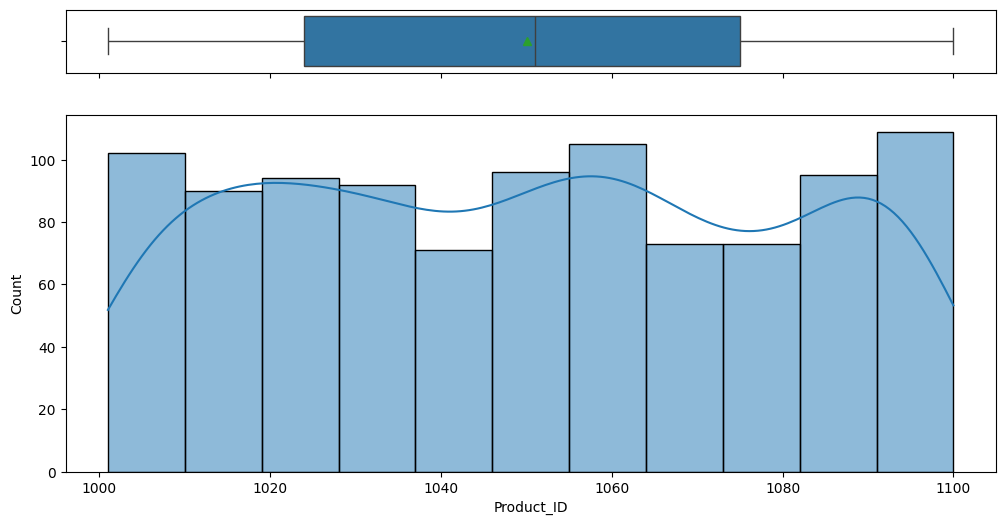

In [ ]:
hist_box(data, "Product_ID")

Insights:

- In the Product_ID there's no Outliers meaning all Product_ID values fall within the expected range of 1000 to 1100. The data is clean with respect to Product_ID
- Is a multimodal distribution, here are distinc peakes between some ranges.

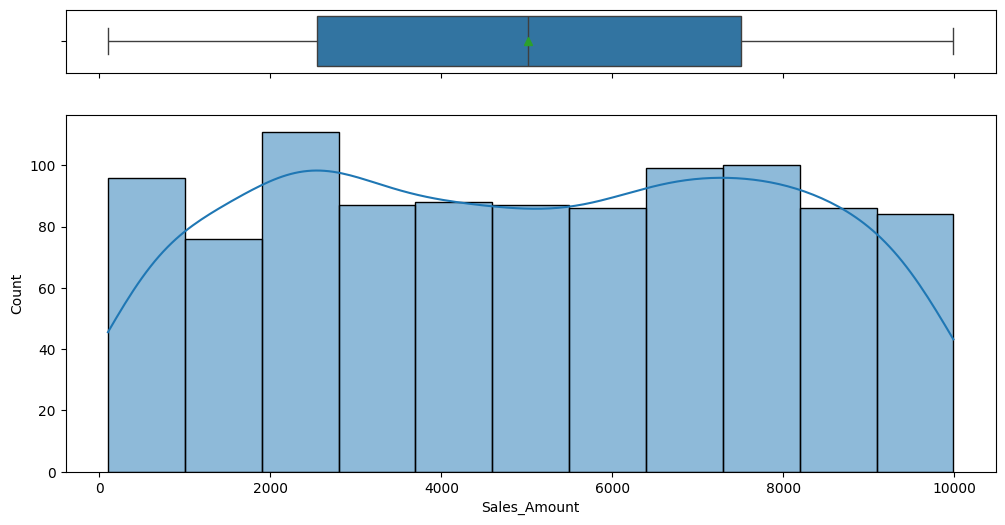

In [ ]:
hist_box(data, "Sales_Amount")

Insights:

- We find that the mean is around 5100-5500.
- Sales Amount has no outliers, so this means the data is clean and is in between the range.
- Also shows a multimodal distribuion.

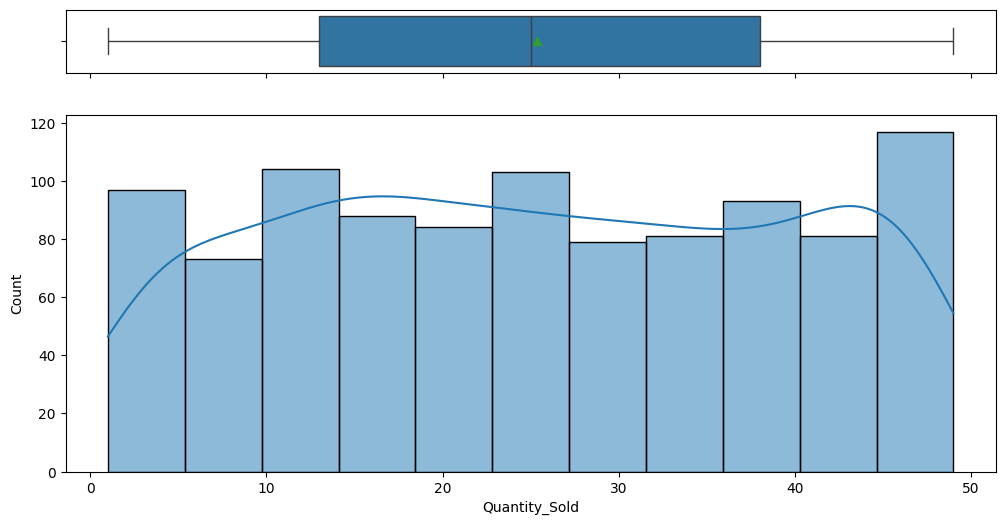

In [ ]:
hist_box(data, "Quantity_Sold")

Insights:

- We find that the mean is around 24 units
- Quantity Sold has no outliers, so this means the data is clean and is in between the range.
- Also is slightly right-skewed and bimodal with 2 peaks at 10-14 and 45-48

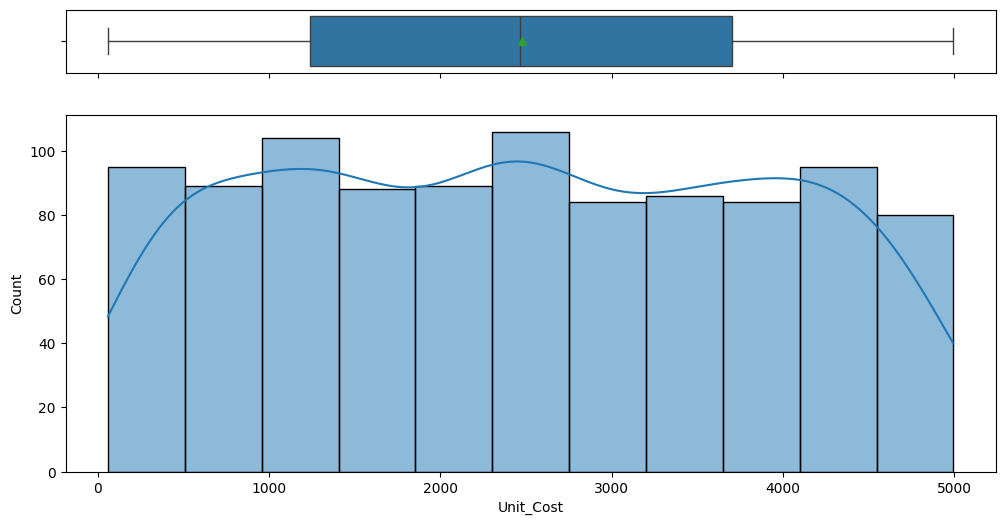

In [ ]:
hist_box(data, "Unit_Cost")

- The mean is around 2500
- It is Multimodal distribution since it reaches the peak 3 times
- No outliers, data clean.


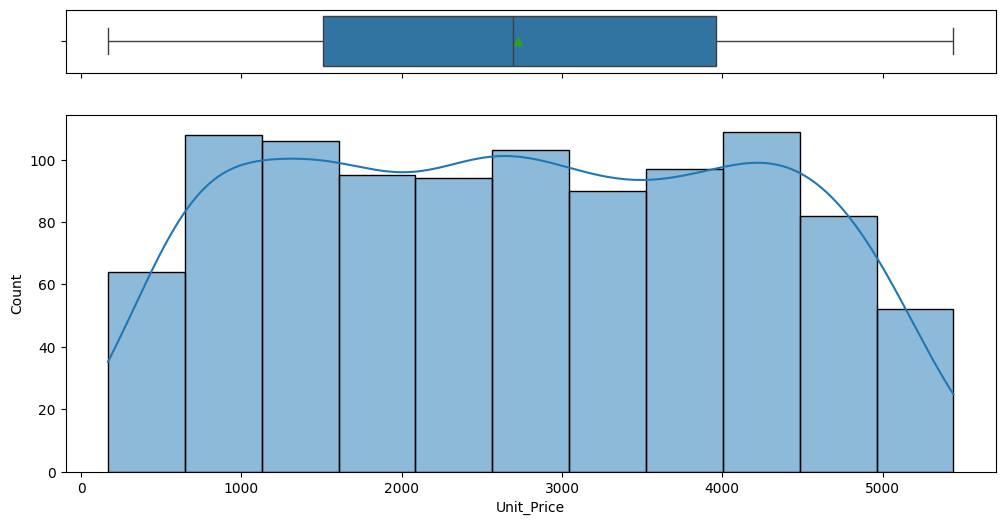

In [ ]:
hist_box(data, "Unit_Price")

- The mean is around 2600
- It is Multimodal distribution since it reaches the peak 3 times
- No outliers, data clean.


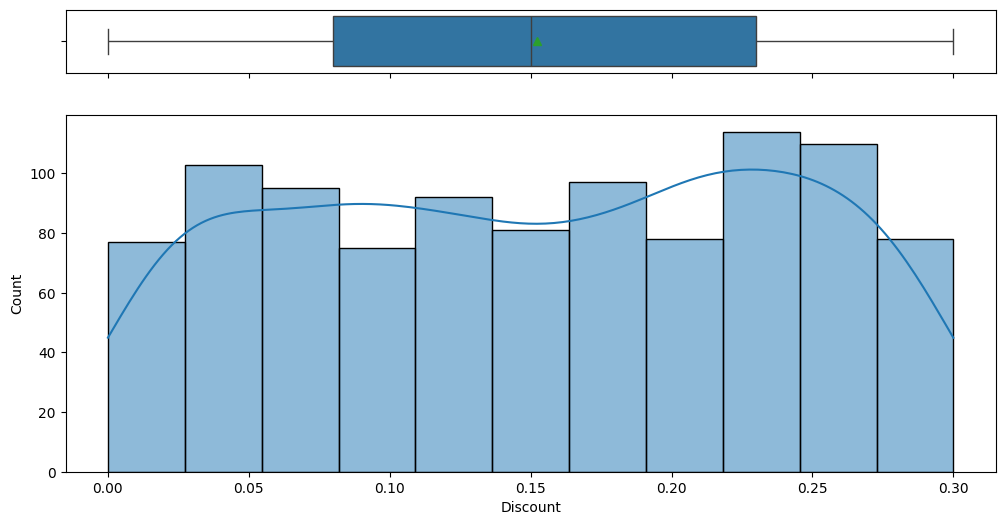

In [ ]:
hist_box(data, "Discount")

- The mean is around 15% of discount
- It is Multimodal distribution since it reaches the peak 3 times
- No outliers, data clean.
- The median is slightly skewed towards higher discounts values.


In [ ]:
#We check object columns to use our count_plot function
data.select_dtypes("object").columns

Index(['Sale_Date', 'Sales_Rep', 'Region', 'Product_Category', 'Customer_Type',
       'Payment_Method', 'Sales_Channel', 'Region_and_Sales_Rep'],
      dtype='object')

In [ ]:
def plot_data_count(data, column_name):
    plt.figure(figsize=(12, 6))

    # Plot count plot with percentage labels
    ax = sns.countplot(x=data[column_name], palette="viridis")
    ax.tick_params(axis='x', rotation=90)
    total = len(data[column_name])

    # Annotate each bar with percentage labels
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

    plt.title("Distribution of " + column_name)
    plt.xlabel(column_name.capitalize().replace('_', ' '))
    plt.ylabel("Count")
    plt.show()

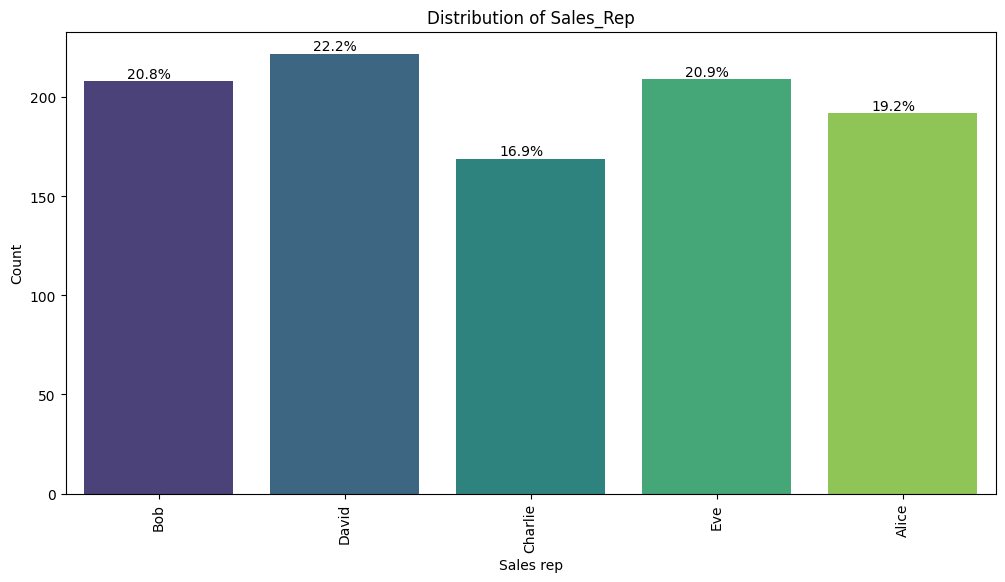

In [ ]:
plot_data_count(data, "Sales_Rep")

- In this data distribution of Sales_Rep, David is the highest seller in the graph with 22.2% of the sales, Eve and Bob following him with 20.9% and 20.8%, the three of them being over 20% of best sellers.
- Meanwhile Alice and Chalie are below 20% with 19.2% for Alice and 16.9% for Charlie.
- This can be caused because of the region, location, type of client, date, etc.

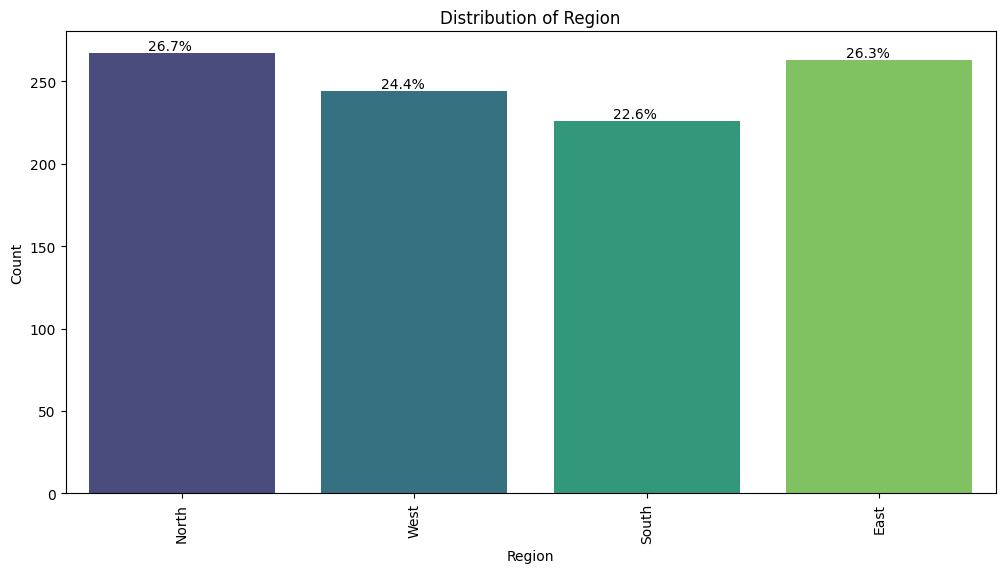

In [ ]:
plot_data_count(data, "Region")

- In this data distribution of Region, North and East have the highest appearances in the dataset with 26.7% and 26.35%
- Meanwhile the South Region appears to be the lowest appearance in the dataset with 22.6%.
- This can be caused because of the type of clients or the products are not popular in those regions.

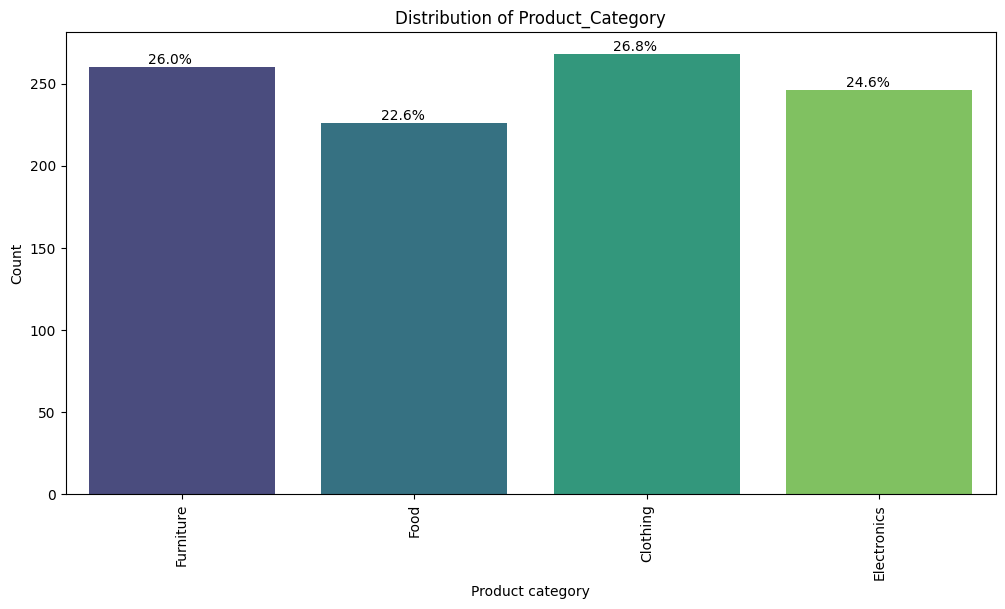

In [ ]:
plot_data_count(data, "Product_Category")

- In this data distribution of Product_Category Furniture and Clothing are the best appearances in the data set with 26% and 26.8% of the dataset.
- Meanwhile Food is the lowest with 22.6% then Electronics with 24.6%
- This suggests that the Food is not the best seller and people are more interested into things rather than food.

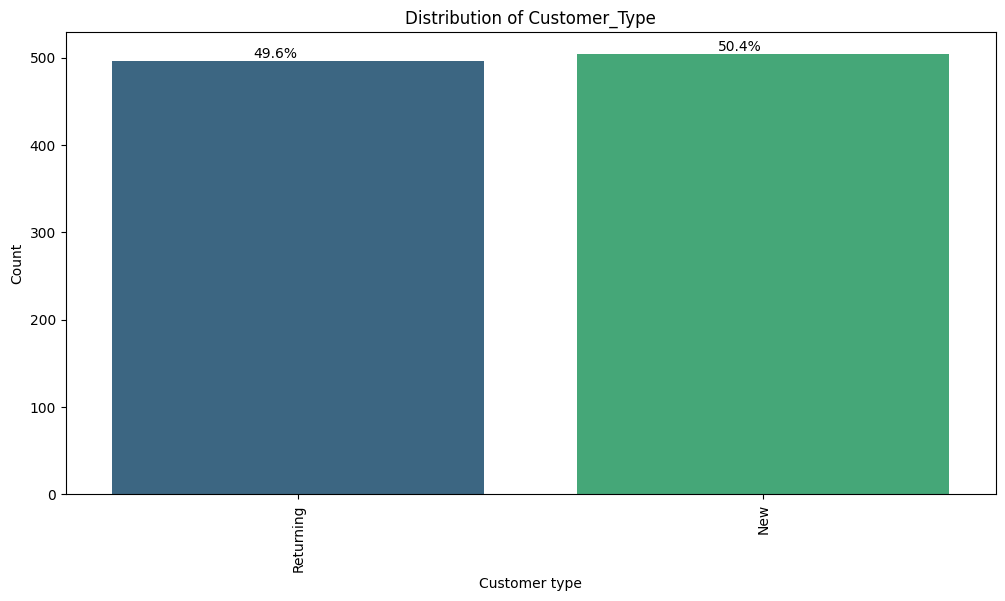

In [ ]:
plot_data_count(data, "Customer_Type")

- In this data distribution of Customer_Type the balance between Returning and New is balanced 49.6% for Returning and 50.4% of new.

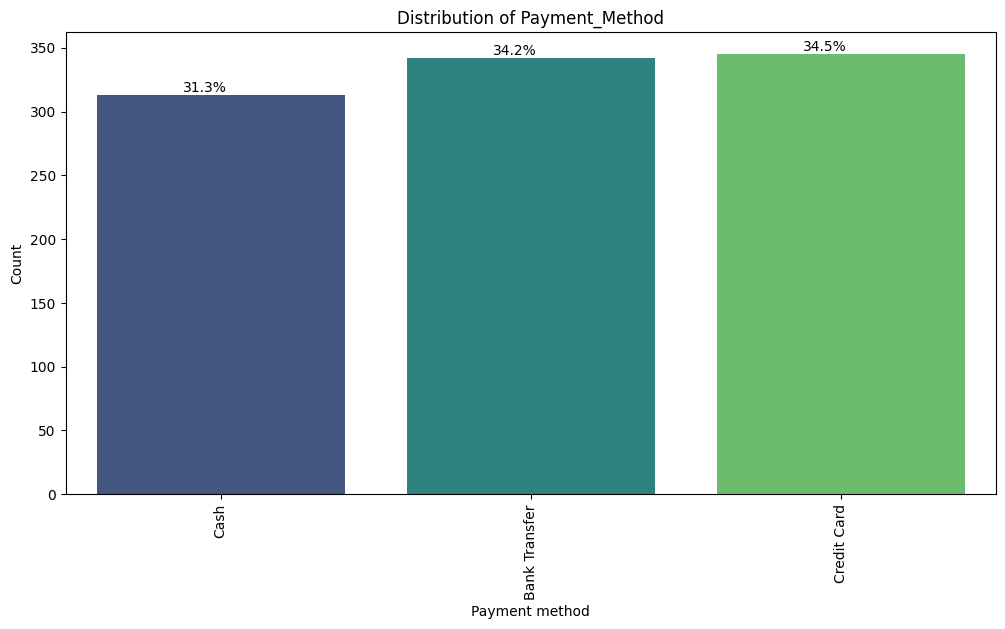

In [ ]:
plot_data_count(data, "Payment_Method")

- In this data distribution of Payments we can analyze that Bank Transfer and Credit Card are most common in the dataset with 34.2% and 34.5% which is 68.7% of the dataset.
- This suggest that Cash is becoming more irregular in the payment method.

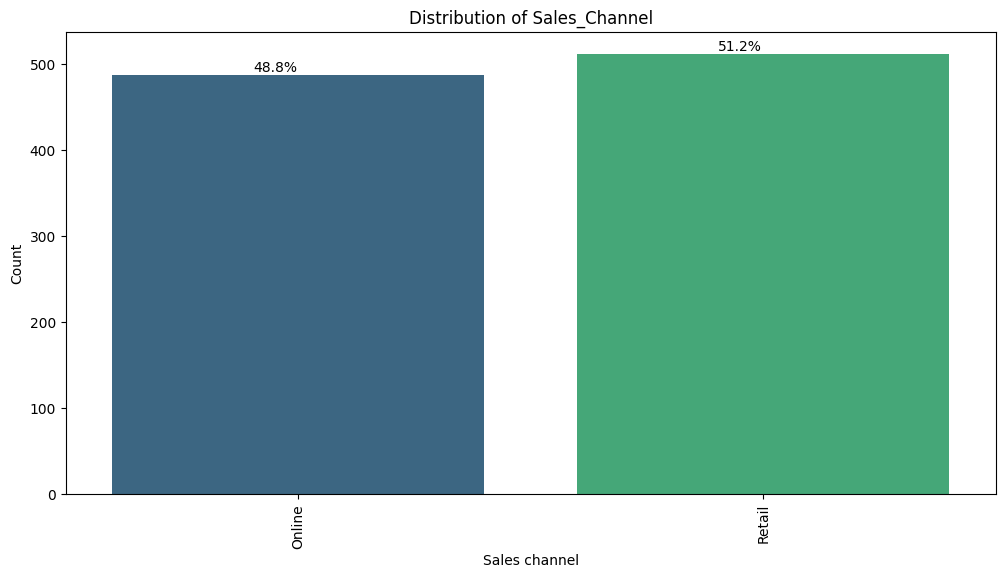

In [ ]:
plot_data_count(data, "Sales_Channel")

- In this data distribution of Sales_Channel the balance between Online and Retail is balanced 48.8% for Retail and 51.2% of new.
- This means that these are products in which you can buy easily without seeing it in person like furniture, electronics but maybe most of the retail are from clothes since you want to try it on. Also Online most of the payments are in Bank Transfer and Credit Card in which confirms the last analysis

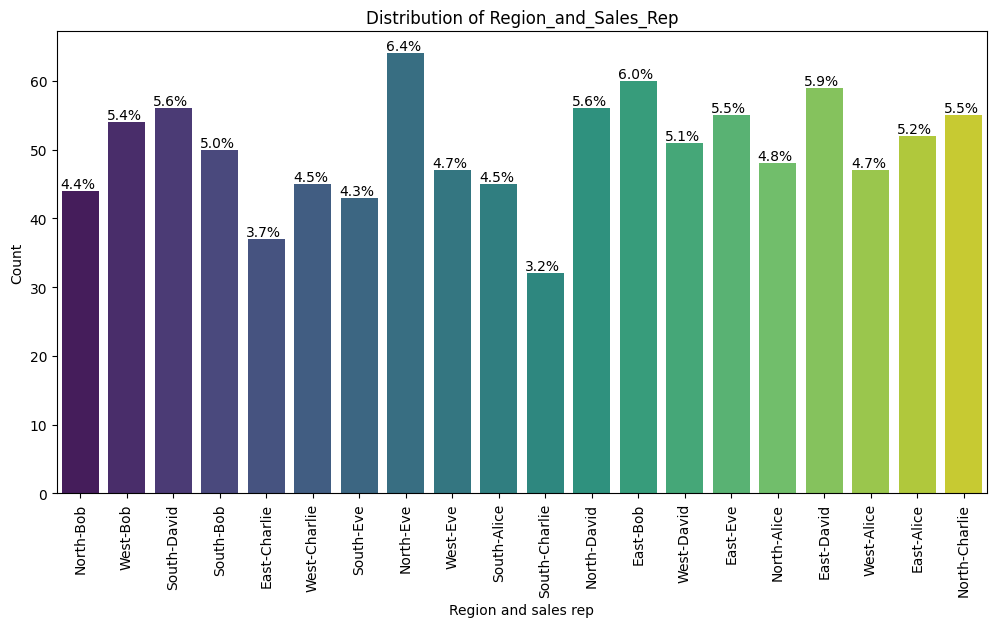

In [ ]:
plot_data_count(data, "Region_and_Sales_Rep")

- In this distribution we can analyze how the sales representants have been doing in every region, this can help us deciding who should focus in which region so that you can get more sales for example:
- Eve has the highest sales in the North and low in South meanwhile David has the highest in South but low in North.

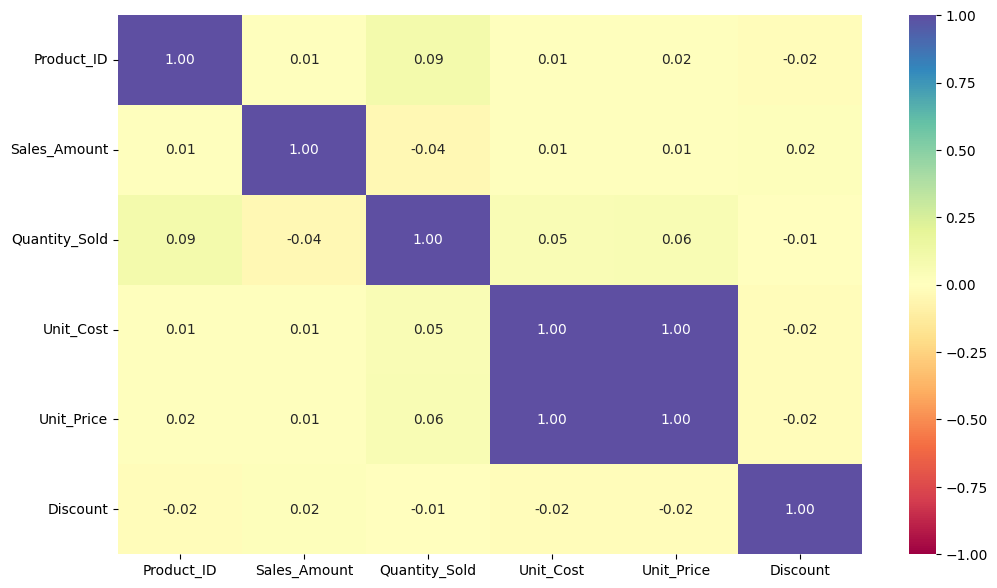

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()


- Almost all the correlations are near to 0, meaning there's a weak relation between them.
- Quantity_Sold has a 0.09 correlation with the Product_ID and 0.05 with Unit_Cost and 0.06 with Unit_Price.
- The correlation matrix heatmap reveals a perfect positive correlation between Unit_Cost and Unit_Price, indicating redundancy or a direct relationship between these variables.

In [ ]:
def simple_bar_plot(df, category_col, value_col):

    # Step 1: Aggregate the data
    total_by_category = df.groupby(category_col, as_index=False)[value_col].sum()
    total_by_category = total_by_category.sort_values(by=value_col, ascending=False)

    # Step 2: Create the bar plot
    fig, ax = plt.subplots(figsize=(10, 6))  # Set figure size
    sns.barplot(x=category_col, y=value_col, data=total_by_category, palette='viridis', ax=ax)
    title='Total Quantity Sold by', category_col
    # Step 3: Customize the plot
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(category_col, fontsize=12)
    ax.set_ylabel(f'Total {value_col}', fontsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels for readability

    # Add annotations
    for container in ax.containers:
        ax.bar_label(container, fmt="%.2f", padding=3, fontsize=10, color='black')

    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()

In [ ]:
#We check object columns to use our count_plot function
data.select_dtypes("object").columns

Index(['Sale_Date', 'Sales_Rep', 'Region', 'Product_Category', 'Customer_Type',
       'Payment_Method', 'Sales_Channel', 'Region_and_Sales_Rep'],
      dtype='object')

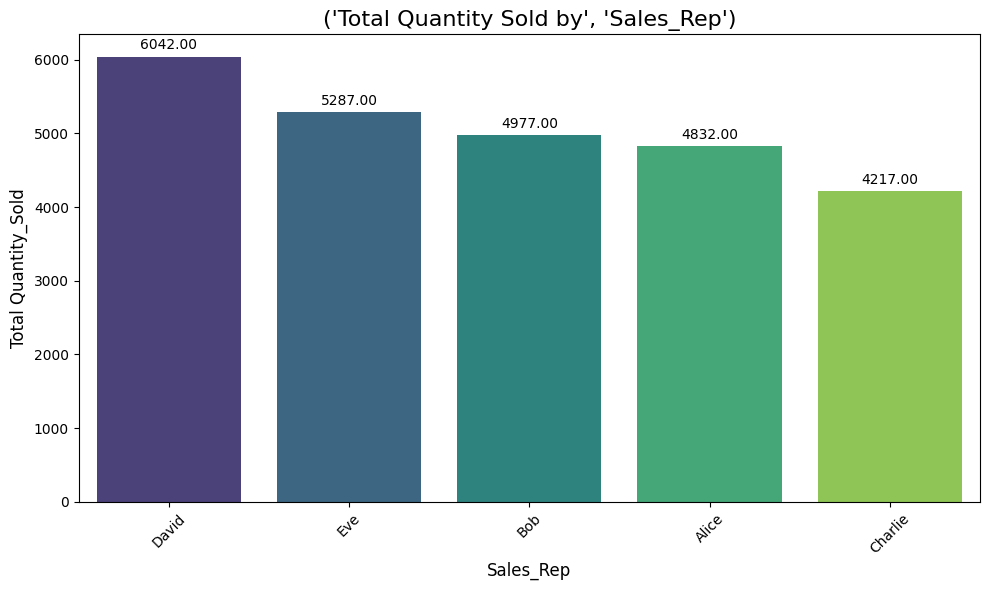

In [ ]:
simple_bar_plot(data, 'Sales_Rep', 'Quantity_Sold', )

- In this bar plot we can say that David is the sales representation with most quantity sells with 6042
- Meanwhile Charlie is the lowest with 4217.
- This data suggest to check what is David doing to do well with sales when the 66% of the other sales representators are below the 5000 quantity sold.

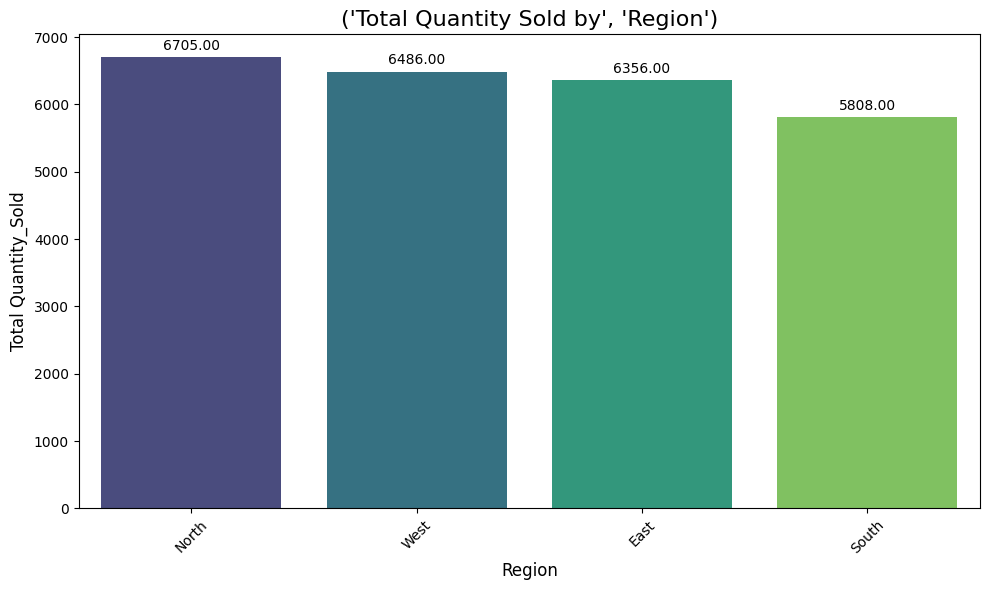

In [ ]:
simple_bar_plot(data, 'Region', 'Quantity_Sold', )

- In this bar plot we can see that North is the Region with the most quantity products sold, then West and East.
- Meanwhile South is the lowest with 5808, we should see why this is happening maybe the representators are not the best in that region or the region is not interested on the products offered.

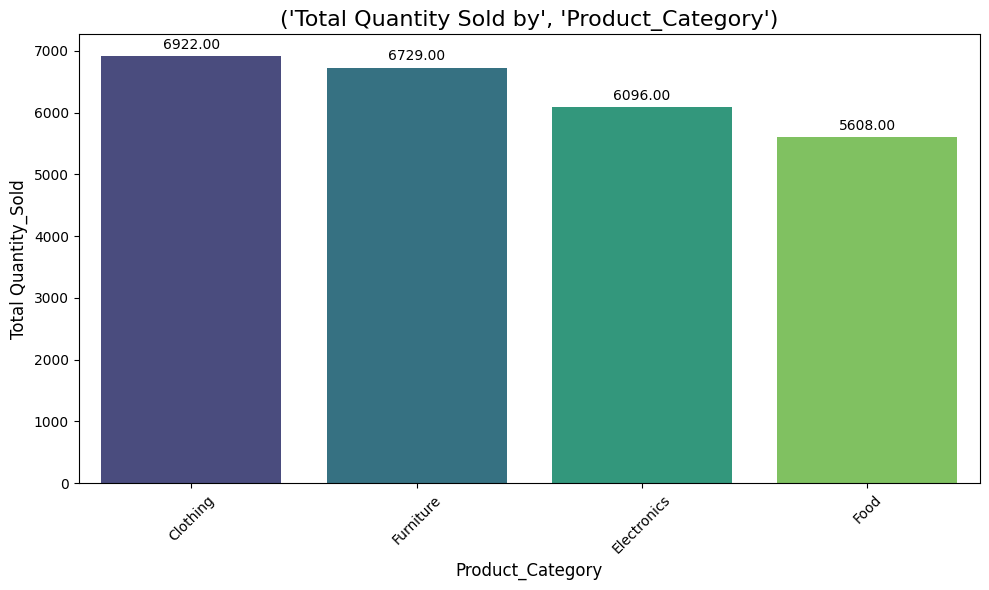

In [ ]:
simple_bar_plot(data, 'Product_Category', 'Quantity_Sold')

- Clothing is the category with most sales, then furniture and Electronics.
- Meanwhile Food is the last in the product_category with 5608 sales, this means that people are more interested in buying "thigs" rather than food.

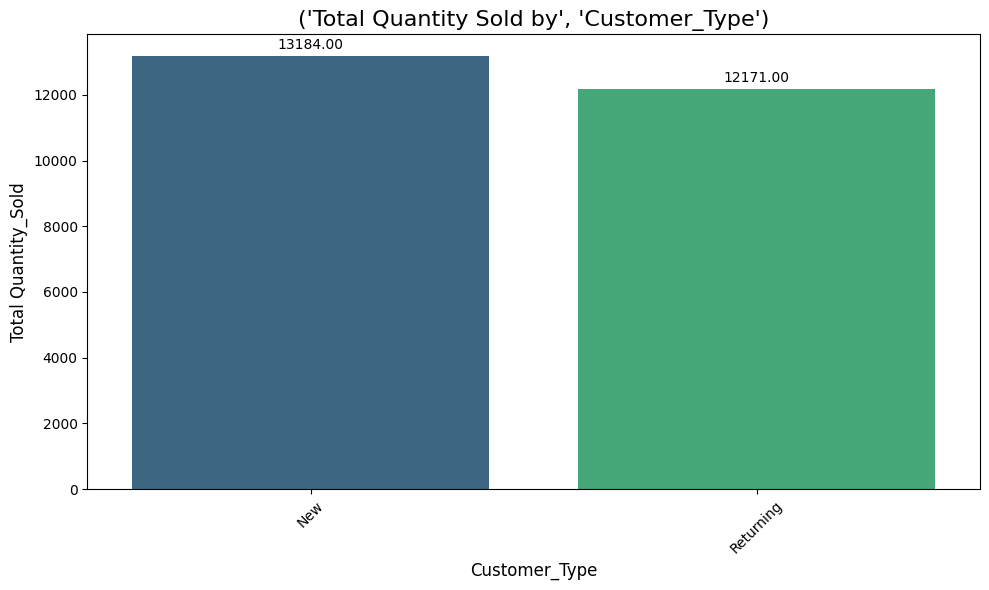

In [ ]:
simple_bar_plot(data, 'Customer_Type', 'Quantity_Sold')

- The new customers tends to buy more quantity than Returning customers, even though that this two customer types were nearly 50% in appearences in the dataset, so this means that new clients tends to buy more than returning.

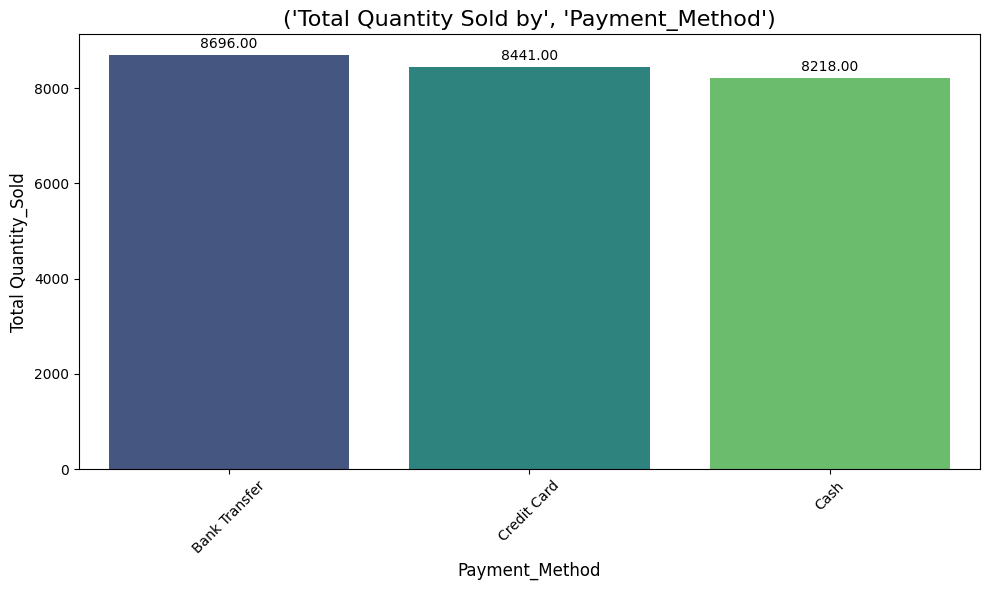

In [ ]:
simple_bar_plot(data, 'Payment_Method', 'Quantity_Sold')

- As we already saw, the payment method is via Bank Transfer and Credit Card, while cash is the lowest of the three, but apparently is almost the same quantity, so this means that even when cash was the least in the appearences in the datased they have been buying good quantity.

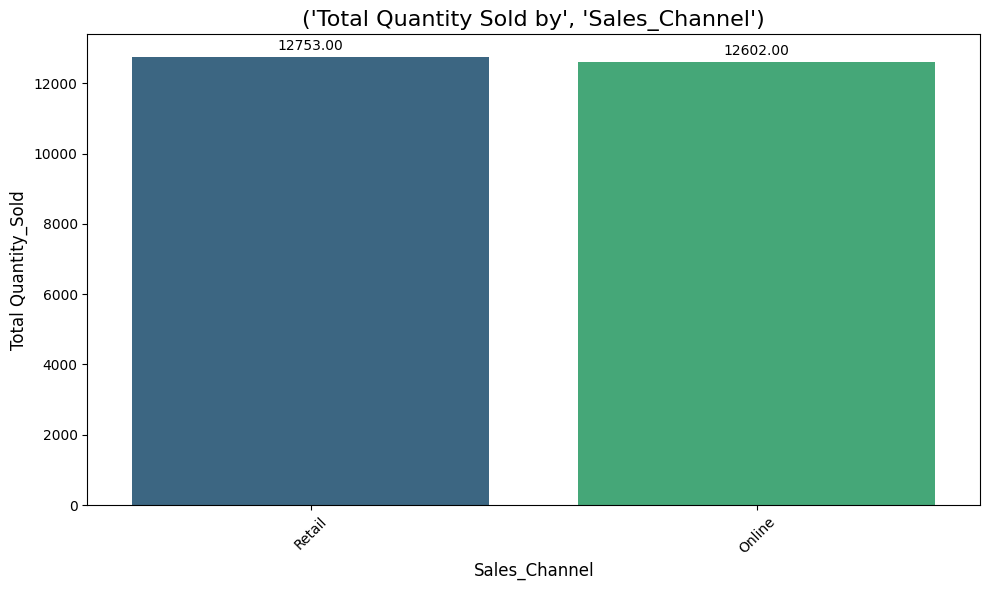

In [ ]:
simple_bar_plot(data, 'Sales_Channel', 'Quantity_Sold')

- Sales Channel Retail and Online are almost the same quantity.

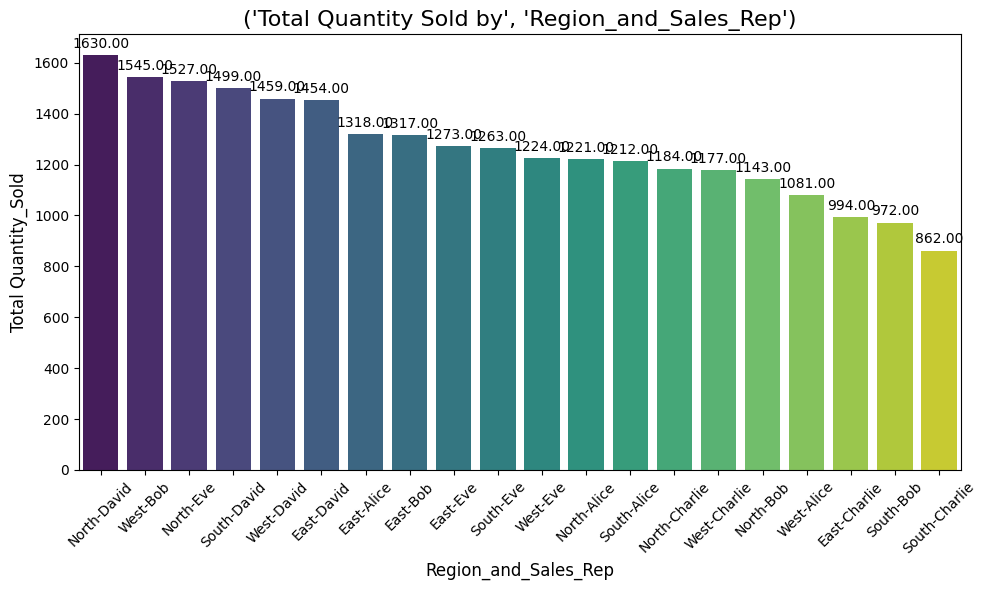

In [ ]:
simple_bar_plot(data, 'Region_and_Sales_Rep', 'Quantity_Sold')

- This data distribution is interesting, we can see that South only has one representator above the 50% of the sales when south has the two last place of quantity sold and North is the greatest.
- Also we can see that David is doing great in North, South and East, West, so he has to be the best Sales Representator since all the regions are above the 50%